# Extracting Pubmed abstracts by scripting NCBI E-utilities in Python

Here, I will show you how NCBI E-Utilities can be used to search for and download Pubmed abstracts. I use Python in conjunction with the NCBI E-Utilities to automate the process, in order to download all the abstracts corresponding to a given search term and simultaneously parse the information contained in each abstract into a data science-friendly format.

## Introduction

When you search Pubmed for a specific topic, you’re presented with thousands of abstracts that contain the keyword you used for your query. Finding the information you’re looking for can get a bit tedious when you have to manually sift through each and every search result (click on the abstract, read it, then click to go back, repeat 100x). Fortunately for you there’s an easier way around this that lets you download hundreds of thousands of full-text abstracts (500 abstracts per page), through which you can easily ctrl-F or scroll through.

Using the NCBI E-Utilities (Entrez Programming Utilities, https://www.ncbi.nlm.nih.gov/books/NBK25499/), you can retrieve and download all the abstracts (along with author info, journal info, and date of publication) associated with a pubmed search. Even better, this tool doesn’t require any software–its completely URL based. You craft a custom URL link in your browser window that retrieves the abstracts for you.

Here's how it works:

Step 1: Craft the URL that will execute a proper esearch result: http://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term=P2RY8&retmax=50&usehistory=y

* http://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi? is the backbone of the esearch function.
* db=pubmed specifies that we will be searching the pubmed database. 
* term=P2RY8 specifies what we will be searching pubmed for. Change this field to whatever you want to search for.
* retmax=50 specifies how many abstracts I want to return using the search.
* usehistory=y will provide you with a QueryKey and WebEnv id that will let you fetch abstracts from this search.
* The “&” signs are just used to separate the different conditions. Make sure to include it starting from after the “db=pubmed” criterion.
Copying and pasting the full URL into my web browser results in this output:

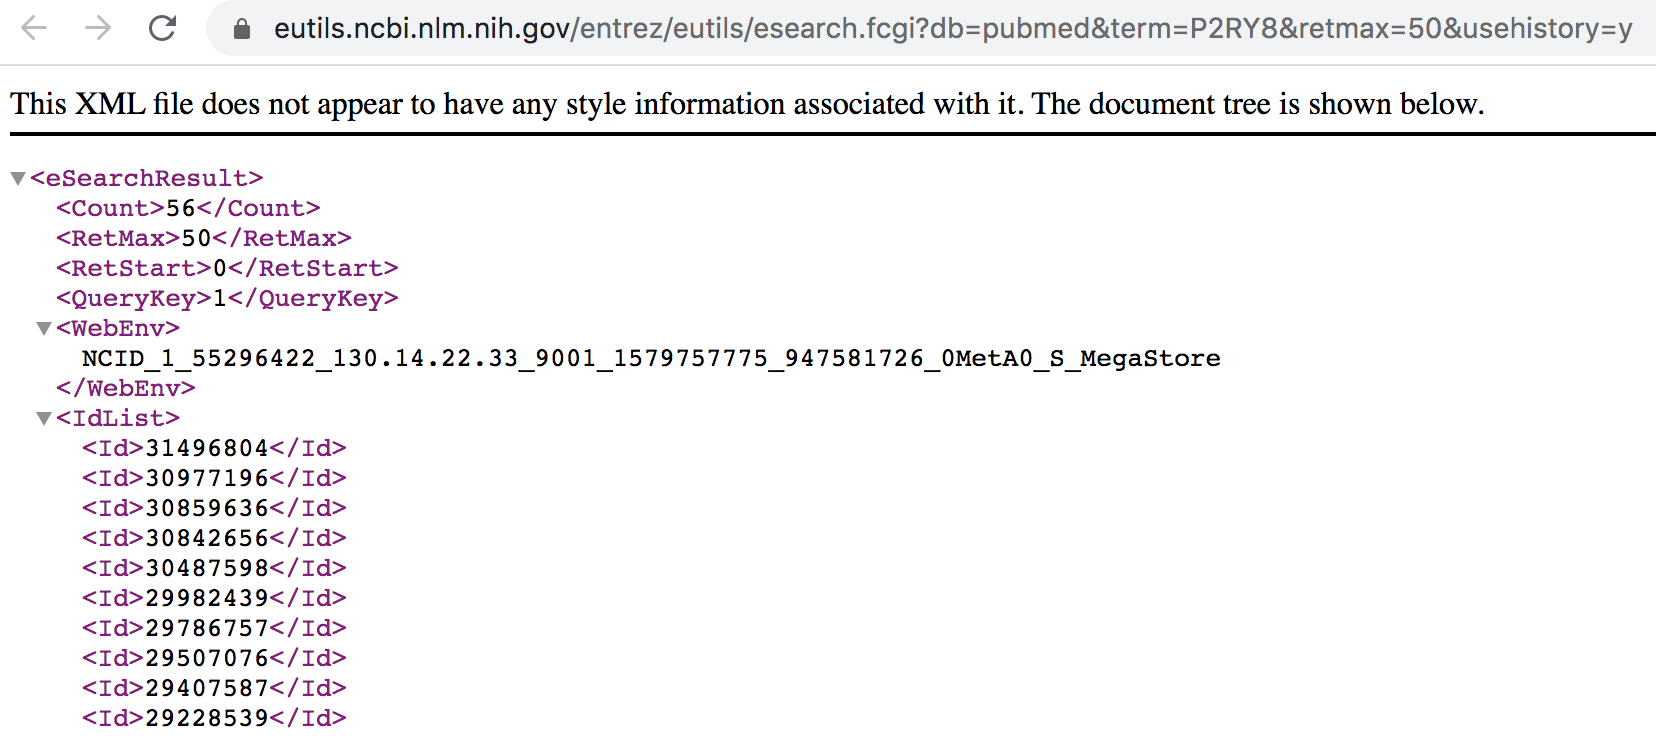

In [18]:
import csv
import re
import urllib
import os
from time import sleep

In [13]:
query = 'P2RY8'

In [15]:
baseURL = 'http://eutils.ncbi.nlm.nih.gov/entrez/eutils/'
eutil_search = 'esearch.fcgi?'
db_setting = 'db=pubmed'
usehistory_setting = '&usehistory=y'
rettype_setting = '&rettype=json'
eutil_fetch = 'efetch.fcgi?'
term_setting = '&term=' + query
retmax = 50
retstart = 0

In [16]:
print(baseURL+eutil_search+db_setting+term_setting+usehistory_setting)

http://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term=P2RY8&usehistory=y


In [21]:
f = urllib.request.urlopen (baseURL+eutil_search+db_setting+term_setting+usehistory_setting+rettype)
data = f.read().decode('utf-8')

In [22]:
data

'<?xml version="1.0" encoding="UTF-8" ?>\n<!DOCTYPE eSearchResult PUBLIC "-//NLM//DTD esearch 20060628//EN" "https://eutils.ncbi.nlm.nih.gov/eutils/dtd/20060628/esearch.dtd">\n<eSearchResult><Count>56</Count><RetMax>20</RetMax><RetStart>0</RetStart><QueryKey>1</QueryKey><WebEnv>NCID_1_307499590_130.14.22.76_9001_1579758965_2013709207_0MetA0_S_MegaStore</WebEnv><IdList>\n<Id>31496804</Id>\n<Id>30977196</Id>\n<Id>30859636</Id>\n<Id>30842656</Id>\n<Id>30487598</Id>\n<Id>29982439</Id>\n<Id>29786757</Id>\n<Id>29507076</Id>\n<Id>29407587</Id>\n<Id>29228539</Id>\n<Id>29194562</Id>\n<Id>29140408</Id>\n<Id>28866095</Id>\n<Id>28597942</Id>\n<Id>28408464</Id>\n<Id>28395118</Id>\n<Id>28371317</Id>\n<Id>28033648</Id>\n<Id>27959929</Id>\n<Id>27899802</Id>\n</IdList><TranslationSet/><TranslationStack>   <TermSet>    <Term>P2RY8[All Fields]</Term>    <Field>All Fields</Field>    <Count>56</Count>    <Explode>N</Explode>   </TermSet>   <OP>GROUP</OP>  </TranslationStack><QueryTranslation>P2RY8[All Fiel

In [23]:
webenv = "&WebEnv=" + re.findall ("<WebEnv>(\S+)<\/WebEnv>", data)[0]
count = int(re.findall("<Count>(\d+?)</Count>",data)[0])
querykey = "&query_key=" + re.findall("<QueryKey>(\d+?)</QueryKey>",data)[0]

In [24]:
webenv

'&WebEnv=NCID_1_307499590_130.14.22.76_9001_1579758965_2013709207_0MetA0_S_MegaStore'

In [25]:
count

56

In [26]:
querykey

'&query_key=1'